<table>
  <tr>
    <td style="text-align: left;">
      <h1>Lighthouse Labs</h1>
      <h2>W4D5 - Introduction to Exploratory Data Analysis (EDA)</h2>
      <strong>Instructor:</strong> Socorro E. Dominguez-Vidana
    </td>
    <td style="text-align: right;">
      <img src="img/lhl.jpeg" alt="LHL" width="200">
    </td>
  </tr>
</table>

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/sedv8808/LHL_Lectures/main?labpath=W4D5%2FW4D5_Intro_to_EDA.ipynb)

Overview:
- [] Introduction to EDA
- [] Statistics for EDA
- [] Data visualization for EDA
    - [] Matplotlib
    - [] Seaborn
    - [] Plotly
- [] Outlier Detection
- [] Handling Missing Values


## Introduction

- EDA involves exploration and preliminary analysis of a dataset.
- Involves examining summary statistics and exploring visualizations of the data. 
- Can uncover anomalies, patterns, and relationships between variables.
- EDA usually goes hand-in hand with data cleaning.
- Further examination can be done by using hypothesis tests.

<table>
  <tr>
    <td style="text-align: left;">
      <h1>Meet Aisha</h1>
      <p>  Aisha is an urban planner tasked with designing new urban spaces in a major European city, where rapid urbanization has caused several issues, including the formation of <strong>U</strong>rban <strong>H</strong>eat <strong>I</strong>slands. <strong>UHI</strong>s result in elevated temperatures in certain areas of the city, which negatively affect public health and increase energy consumption. </p><p>

Aisha found [Open AQ](https://openaq.org/), an API that contains pollution data. She also found Weather Data for her city using the [Meteostat](https://dev.meteostat.net/python/#installation) Python library. Once the data has been downloaded, Aisha will do **E**xploratory **D**ata **A**nalysis (**EDA**) to identify *pollution* and *temperature* patterns that contribute to these heat islands and find ways to mitigate them through smarter urban planning.
</p>
    </td>
    <td style="text-align: right;">
      <img src="https://png.pngtree.com/png-vector/20221205/ourmid/pngtree-muslim-woman-using-laptop-png-image_6511735.png" alt="geologist" width="500"><br>
      <a href="https://png.pngtree.com/png-vector/20221205/ourmid/pngtree-muslim-woman-using-laptop-png-image_6511735.png" target="_blank">Muslim Girl Using Laptop</a>
    </td>
  </tr>
</table>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Loading and Understanding the Data

In [2]:
df = pd.read_csv('data/amsterdam_AQ.csv', parse_dates = ['date'])

In [3]:
df.shape

(5439, 8)

In [4]:
# Observe the raw data.
df.head()

,sensor_id,parameter,parameter_units,value,date,latitude,longitude,tavg
0,164,co,µg/m³,0.22,2022-08-30,52.389983,4.887811,18.9
1,164,co,µg/m³,0.27,2022-08-31,52.389983,4.887811,18.8
2,164,co,µg/m³,0.26,2022-09-01,52.389983,4.887811,18.9
3,164,co,µg/m³,0.39,2022-09-02,52.389983,4.887811,19.6
4,164,co,µg/m³,0.35,2022-09-03,52.389983,4.887811,20.5


Here is the data dictionary **Aisha** wrote, just in case, in the future she forgets what the data means:

| **Field Name**        | **Description**                                               | **Data Type**        | **Example Value**        |
|-----------------------|---------------------------------------------------------------|----------------------|---------------------------|
| `sensor_id`           | Unique identifier for the air quality sensor                 | String or Integer    | `12345`                   |
| `parameter`           | Air quality parameter being measured (e.g., pollutants)      | String               | `PM2.5`                   |
| `parameter_units`     | Units of measurement for the parameter                        | String               | `µg/m³`                   |
| `value`               | Measured value of the parameter                               | Float or Integer     | `15.2`                    |
| `date`                | Date of the measurement                              | Datetime             | `2022-09-01`   |
| `latitude`            | Latitude of the sensor's location                             | Float                | `52.3676`                 |
| `longitude`           | Longitude of the sensor's location                            | Float                | `4.9041`                  |
| `tavg`                | Average temperature at the time of measurement               | Float                | `18.5`                    |

**Aisha's Goal:**  explore how pollution and temperature interact and where heat patterns occur.

**What does she need?** Measurements of pollutants like **CO**, **NO2**, and temperature variations.

#### Initial Data Exploration

- Generates summary statistics
- Visualize the distribution of temperature and pollutants to identify any initial trends or potential issues like missing data or errors in the data.

In [6]:
df.describe(include='all')

,sensor_id,parameter,parameter_units,value,date,latitude,longitude,tavg
count,5.439000e+03,5439,5439,5439.000000,5439,5439.000000,5439.000000,5439.000000
unique,NaN,7,1,NaN,NaN,NaN,NaN,NaN
top,NaN,no,µg/m³,NaN,NaN,NaN,NaN,NaN
freq,NaN,1382,5439,NaN,NaN,NaN,NaN,NaN
mean,1.335117e+06,NaN,NaN,15.310678,2023-02-15 01:08:02.515168,52.376177,4.885997,10.614837
min,1.190000e+02,NaN,NaN,-5.100000,2022-08-30 00:00:00,52.358039,4.860319,-3.300000
25%,4.244000e+03,NaN,NaN,1.700000,2022-12-01 00:00:00,52.359714,4.866208,6.600000
50%,4.390000e+03,NaN,NaN,10.000000,2023-02-08 00:00:00,52.374786,4.887811,10.300000
75%,4.275709e+06,NaN,NaN,21.000000,2023-04-30 00:00:00,52.389983,4.899700,15.200000
max,5.079267e+06,NaN,NaN,180.000000,2023-08-30 00:00:00,52.393972,4.943822,24.700000


Although we can see that there are some statistics, the `parameter` column does not seem very useful as it is.

For our analysis, we really do not need the `sensor_id` data, as each sensor only captures one pollutant. Let's remove the `sensor_id` and pivot the table so that we actually see the important parameters.

Let's display a few rows of the `DataFrame` to have an idea if this is what we need.

In [7]:
df['parameter'].unique()

array(['co', 'no', 'no2', 'o3', 'pm10', 'pm25', 'so2'], dtype=object)

In [8]:
df2 = df.drop(columns = 'sensor_id').pivot_table(index=['date', 'latitude',
       'longitude', 'tavg'], columns='parameter', values='value').reset_index()
df2.shape

(2016, 11)

In [10]:
df.head(2)

,sensor_id,parameter,parameter_units,value,date,latitude,longitude,tavg
0,164,co,µg/m³,0.22,2022-08-30,52.389983,4.887811,18.9
1,164,co,µg/m³,0.27,2022-08-31,52.389983,4.887811,18.8


In [9]:
df2.head()

parameter,date,latitude,longitude,tavg,co,no,no2,o3,pm10,pm25,so2
0,2022-08-30,52.358039,4.899700,18.9,NaN,NaN,12.0,NaN,13.0,5.8,NaN
1,2022-08-30,52.359714,4.866208,18.9,0.20,NaN,14.0,79.0,12.0,7.2,NaN
2,2022-08-30,52.374786,4.860319,18.9,NaN,NaN,16.0,NaN,13.0,NaN,NaN
3,2022-08-30,52.389314,4.943822,18.9,NaN,NaN,4.0,69.0,NaN,NaN,NaN
4,2022-08-30,52.389983,4.887811,18.9,0.22,NaN,14.0,62.0,14.0,6.3,NaN


In [11]:
# Observe a specific date.
df2[df2['date'] == '2022-08-30']

parameter,date,latitude,longitude,tavg,co,no,no2,o3,pm10,pm25,so2
0,2022-08-30,52.358039,4.899700,18.9,NaN,NaN,12.0,NaN,13.0,5.8,NaN
1,2022-08-30,52.359714,4.866208,18.9,0.20,NaN,14.0,79.0,12.0,7.2,NaN
2,2022-08-30,52.374786,4.860319,18.9,NaN,NaN,16.0,NaN,13.0,NaN,NaN
3,2022-08-30,52.389314,4.943822,18.9,NaN,NaN,4.0,69.0,NaN,NaN,NaN
4,2022-08-30,52.389983,4.887811,18.9,0.22,NaN,14.0,62.0,14.0,6.3,NaN
5,2022-08-30,52.393972,4.870157,18.9,NaN,NaN,NaN,NaN,11.0,5.4,0.95


In [12]:
# Visualize summary of statistics
df2.describe()

parameter,date,latitude,longitude,tavg,co,no,no2,o3,pm10,pm25,so2
count,2016,2016.000000,2016.000000,2016.000000,464.000000,1382.000000,1286.000000,519.000000,749.000000,770.000000,269.000000
mean,2023-03-08 07:18:34.285714176,52.376930,4.890129,11.424405,0.282269,6.563606,22.816991,46.377823,17.405073,9.659675,0.690746
min,2022-08-30 00:00:00,52.358039,4.860319,-3.300000,0.075000,-5.100000,0.550000,-1.800000,3.200000,-4.200000,-0.100000
25%,2022-12-17 00:00:00,52.359714,4.866208,7.000000,0.210000,0.300000,14.000000,31.500000,12.000000,4.900000,0.300000
50%,2023-03-07 00:00:00,52.374786,4.887811,11.600000,0.270000,2.550000,20.000000,48.000000,16.000000,7.300000,0.580000
75%,2023-06-04 00:00:00,52.389983,4.904400,16.300000,0.332500,7.575000,30.000000,61.000000,21.000000,12.000000,0.930000
max,2023-08-30 00:00:00,52.393972,4.943822,24.700000,0.650000,180.000000,82.000000,110.000000,60.000000,45.000000,3.700000
std,NaN,0.013718,0.027191,5.991488,0.105376,12.862397,12.823187,21.528311,8.160573,7.327437,0.552440


Some observations we can make:
- **Date**: The data only compresses one year.
- **Carbon Monoxide (CO)**: The negative minimum may indicate data issues or errors in measurement or reporting.
- **Nitric Oxide (NO)**: It seems to have a high standard deviation...
- **Nitrogen Dioxide (NO2)**: Some days, there seems to be a moderate level of air pollution.
- **Ozone (O3)**: Some days, there is a high ozone concentration (maximum of 110).
- **Particulate Matter**: Some days it seems high.
- **Sulfur Dioxide (SO2)** Average of 0.69, some days, it goes really high with 3.7.

**Note:** In `pd.describe()` **NaN**s are not used in statistical calculations (e.g., average, count)

Let's check for missing values:

In [13]:
missing_values = df2.isnull().sum()
missing_percentage = (missing_values / df2.shape[0]) * 100

In [14]:
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data[missing_data['Missing Values'] > 0]

,Missing Values,Percentage
parameter,,
co,1552,76.984127
no,634,31.448413
no2,730,36.210317
o3,1497,74.255952
pm10,1267,62.847222
pm25,1246,61.805556
so2,1747,86.656746


## Handling Missing Values

Why do **Missing Values** happen?
- The sensor might have not worked that day.
- If it is a survey, people may choose to not answer.
- Value that is inconsistently recorded.

Based on the missing values, we need to decide how to handle them. 
Some possible options are:

- Dropping rows with missing values
- Imputing missing values with the `mean`, `median`, or `mode` 
- Use regression or another ML method.

### Filling Missing Values

- **Why Fill Missing Values?**: In many cases, dropping rows with missing values can lead to losing a significant amount of data, especially if missing data is common. Instead, we fill the missing values to retain as much information as possible.
  
- **Why Use the Mean?**: Filling missing values with the mean is a simple and common approach, particularly if the data is evenly distributed and outliers are not a concern. However, if the data has outliers or is skewed, filling with the median might be more appropriate.
  
- **Alternative Approaches**: Depending on the context, other methods such as regression imputation or filling based on group-level means (e.g., by date or location) can offer better results.

**Discussion:** Why do we have so many "missing values" in this particular data set?

We can fill all missing values with the mean of the column by simply doing:

```python
df_filled = df2.fillna(df2.mean())
```

But think if that would be enough and document your reasoning.

Is it feasible to drop rows with `NaN`s for us today?

In [17]:
df2.head()

parameter,date,latitude,longitude,tavg,co,no,no2,o3,pm10,pm25,so2
0,2022-08-30,52.358039,4.899700,18.9,NaN,NaN,12.0,NaN,13.0,5.8,NaN
1,2022-08-30,52.359714,4.866208,18.9,0.20,NaN,14.0,79.0,12.0,7.2,NaN
2,2022-08-30,52.374786,4.860319,18.9,NaN,NaN,16.0,NaN,13.0,NaN,NaN
3,2022-08-30,52.389314,4.943822,18.9,NaN,NaN,4.0,69.0,NaN,NaN,NaN
4,2022-08-30,52.389983,4.887811,18.9,0.22,NaN,14.0,62.0,14.0,6.3,NaN


In [16]:
df2.isnull().any(axis=1).sum()

np.int64(2016)

In [19]:
# Filling missing values with the mean after grouping by date.
df_filled = df2.groupby(['date']).transform(lambda x: x.fillna(x.mean()))
df_filled['date'] = df2['date']

# Filling missing values by location afterwards
df_filled = df_filled.groupby(['latitude', 'longitude']
                             ).transform(lambda x: x.fillna(x.mean()))
df_filled['latitude'] = df2['latitude']
df_filled['longitude'] = df2['longitude']
df_filled.head()

parameter,tavg,co,no,no2,o3,pm10,pm25,so2,date,latitude,longitude
0,18.9,0.21,9.220395,12.0,70.0,13.0,5.800,0.95,2022-08-30,52.358039,4.899700
1,18.9,0.20,1.580324,14.0,79.0,12.0,7.200,0.95,2022-08-30,52.359714,4.866208
2,18.9,0.21,12.274537,16.0,70.0,13.0,6.175,0.95,2022-08-30,52.374786,4.860319
3,18.9,0.21,2.441638,4.0,69.0,12.6,6.175,0.95,2022-08-30,52.389314,4.943822
4,18.9,0.22,8.839829,14.0,62.0,14.0,6.300,0.95,2022-08-30,52.389983,4.887811


In [20]:
missing_values = df_filled.isnull().sum()
missing_percentage = (missing_values / df_filled.shape[0]) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data[missing_data['Missing Values'] > 0]

,Missing Values,Percentage
parameter,,


In [22]:
len(df_filled.columns)

11

You an also remove when there are too many nulls just in the row and if this is possible.

For that:
```python
df_filled = df_filled.dropna(thresh=len(df_filled.columns) - 3)
```

#### Understanding Data Distribution

Understanding the distribution of air quality data is crucial for Aisha. It informs her about the typical levels of pollutants and helps identify potential health risks for residents. For instance, high levels of **PM2.5** can lead to respiratory issues, making it essential to monitor.

A **box-plot** is also often used to examine distributions. Here you can visualize the `min`, `max`, each of the `quartiles`, the `IQR`, and any **"outliers"**. 

In the default box-plot settings, outliers are determined to be those which are larger than $Q_3 + 1.5 \times IQR$ or smaller than $Q_1 - 1.5 \times IQR$. This value of 1.5 can be changed by specifying the `whis` parameter.

**Example 1** and **Example 2** in [W4D5_Examples.ipynb](W4D5_Examples.ipynb)
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/sedv8808/LHL_Lectures/main?labpath=W4D5%2FW4D5_Examples.ipynb)

In [23]:
df_melted = df_filled.melt(value_vars=['co', 'no', 'no2', 'o3', 'pm10', 'pm25', 'so2'],
                            var_name='parameter', 
                            value_name='value')
df_melted.head(2)

,parameter,value
0,co,0.21
1,co,0.20


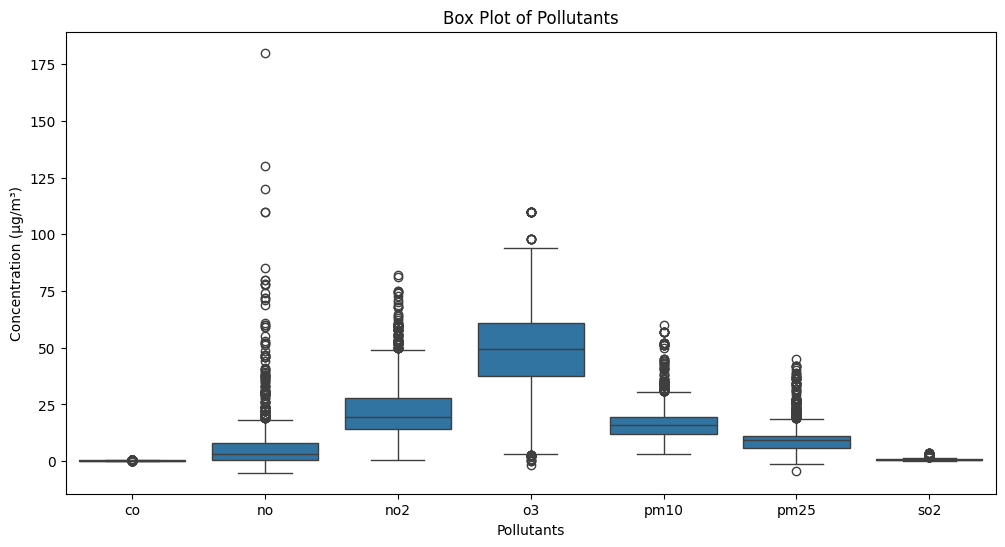

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='parameter', y='value', data=df_melted)
plt.title('Box Plot of Pollutants')
plt.xlabel('Pollutants')
plt.ylabel('Concentration (µg/m³)')
plt.show()

### More null values
- Sometimes `null` values aren't exactly `NaN`s
- They are encoded as `-1`, `0`, or `9999` etc.

Aisha examines the box plots and detects what she had seen from the summary of statistics before. She has `negative` values. She researches and finds out that those are possibly errors from the sensors.

In [25]:
for pollutant in df_melted['parameter'].unique():
    print(f"Negative values for {pollutant}: {(df_filled[pollutant] < 0).sum()}")

Negative values for co: 0
Negative values for no: 262
Negative values for no2: 0
Negative values for o3: 1
Negative values for pm10: 0
Negative values for pm25: 3
Negative values for so2: 35


She decides to remove rows with negative values as they make no sense and she cannot find a person who can explain those values.

In [26]:
df_filled.select_dtypes(include='number')

parameter,tavg,co,no,no2,o3,pm10,pm25,so2,latitude,longitude
0,18.9,0.210,9.220395,12.00,70.0,13.0,5.800000,0.95,52.358039,4.899700
1,18.9,0.200,1.580324,14.00,79.0,12.0,7.200000,0.95,52.359714,4.866208
2,18.9,0.210,12.274537,16.00,70.0,13.0,6.175000,0.95,52.374786,4.860319
3,18.9,0.210,2.441638,4.00,69.0,12.6,6.175000,0.95,52.389314,4.943822
4,18.9,0.220,8.839829,14.00,62.0,14.0,6.300000,0.95,52.389983,4.887811
...,...,...,...,...,...,...,...,...,...,...
2011,14.8,0.385,3.622750,21.00,33.0,13.0,10.328107,0.54,52.372056,4.904400
2012,14.8,0.385,3.622750,32.00,33.0,13.0,9.843767,0.54,52.374786,4.860319
2013,14.8,0.385,0.950000,23.75,33.0,13.0,9.742344,0.54,52.389314,4.943822
2014,14.8,0.310,9.700000,28.00,33.0,13.0,11.256190,0.54,52.389983,4.887811


In [27]:
# Filter numeric columns
numeric_cols = df_filled.select_dtypes(include='number')

# Remove rows where there is a negative value
df_filled = df_filled[(numeric_cols >= 0).all(axis=1)]
df_filled.shape

(1681, 11)

If it was just `0` and you preferred replacing them:
```python
# cols with inappropriate 0s
cols_missing_vals = ['pm25', 'o3']

# replace 0's with NaNs
df_filled[cols_missing_vals] = df_filled[cols_missing_vals].replace(0, np.NaN)
df_filled.isnull().sum()
```

#### Visualizing a Single Variable at a Time

One useful visualization for EDA is a **histogram**. A histogram gives us an idea of the **distribution** of a set of numbers. 

**Example 3** and **Example 4** in [W4D5_Examples.ipynb](W4D5_Examples.ipynb) [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/sedv8808/LHL_Lectures/main?labpath=W4D5%2FW4D5_Examples.ipynb)

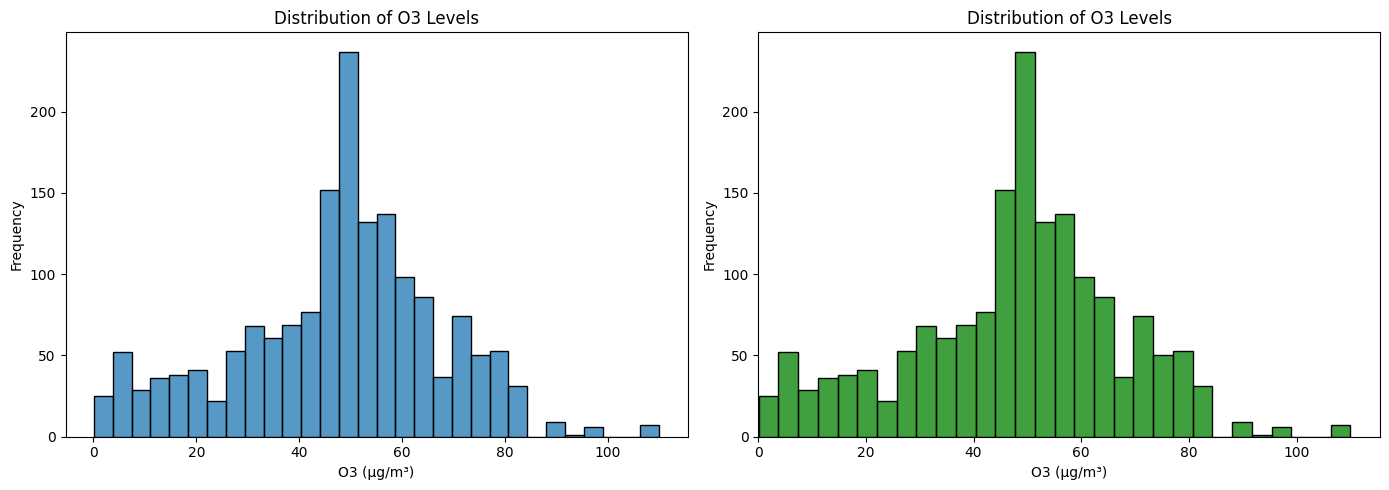

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

sns.histplot(df_filled['o3'], bins=30, ax=axes[0])
axes[0].set_title('Distribution of O3 Levels')
axes[0].set_xlabel('O3 (µg/m³)')
axes[0].set_ylabel('Frequency')

sns.histplot(df_filled['o3'], bins=30, color='green', ax=axes[1])
axes[1].set_title('Distribution of O3 Levels')
axes[1].set_xlabel('O3 (µg/m³)')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(left=0)

plt.tight_layout()
plt.show()

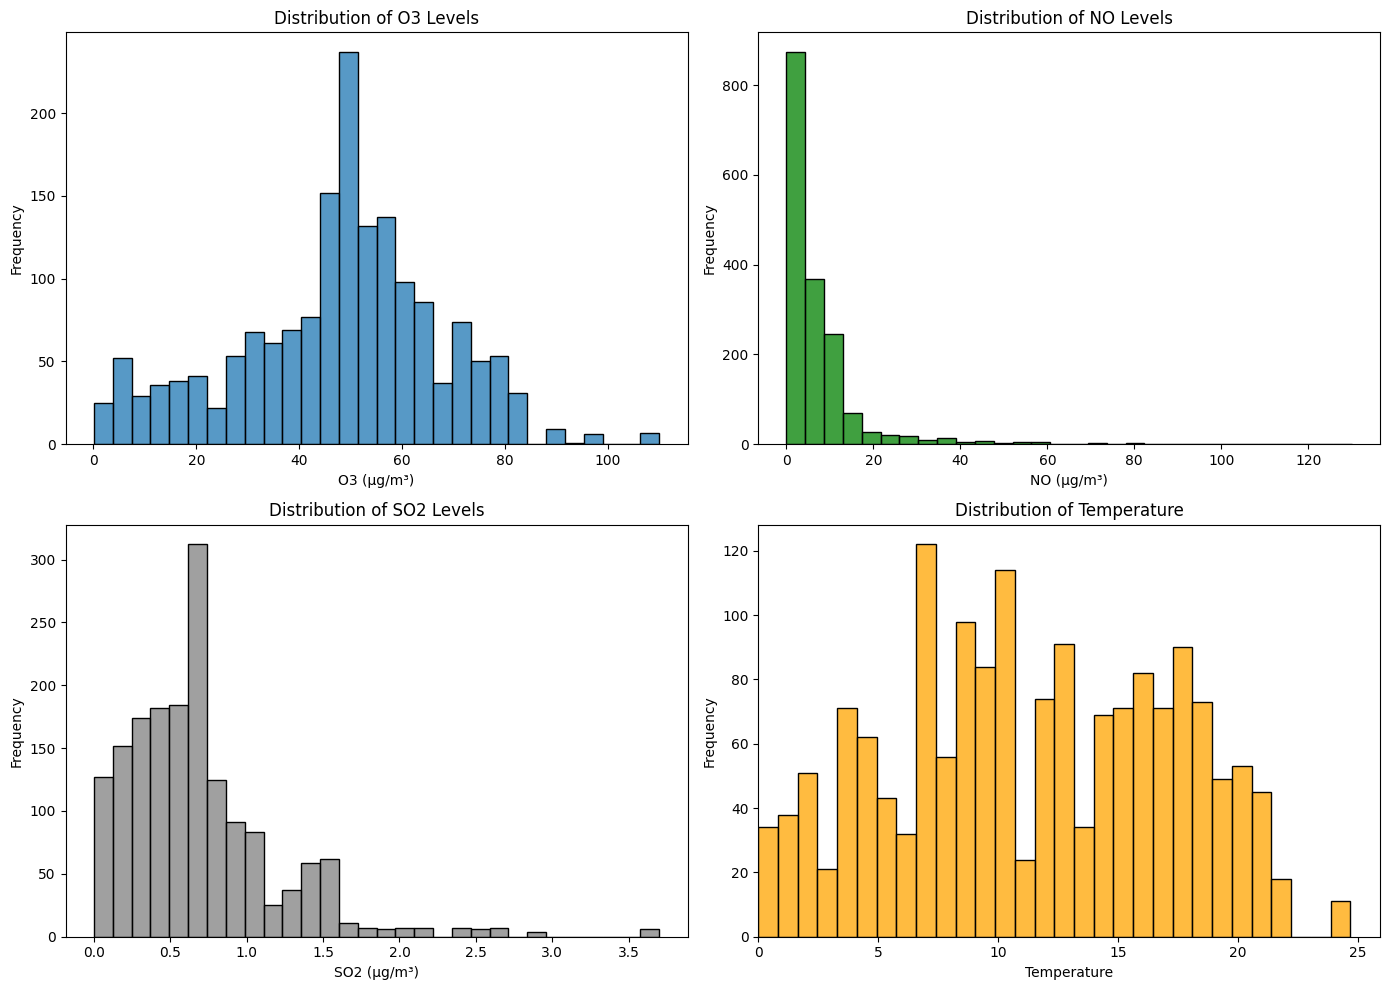

In [29]:
fig, axes = plt.subplots(nrows=2, 
                         ncols=2, 
                         figsize=(14, 10))

sns.histplot(df_filled['o3'], bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of O3 Levels')
axes[0, 0].set_xlabel('O3 (µg/m³)')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(df_filled['no'], bins=30, color='green', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of NO Levels')
axes[0, 1].set_xlabel('NO (µg/m³)')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(df_filled['so2'], bins=30, color='grey', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of SO2 Levels')
axes[1, 0].set_xlabel('SO2 (µg/m³)')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(df_filled['tavg'], bins=30, color='orange', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Temperature')
axes[1, 1].set_xlabel('Temperature')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_xlim(left=0)

plt.tight_layout()
plt.show()

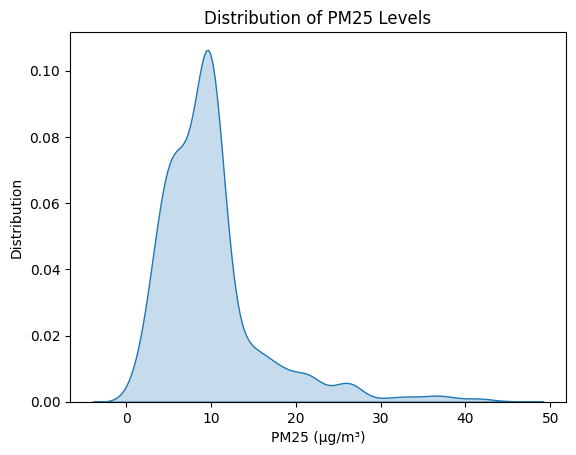

In [30]:
sns.kdeplot(data=df_filled, x='pm25', fill=True, label='PM25')
plt.title('Distribution of PM25 Levels')
plt.xlabel('PM25 (µg/m³)')
plt.ylabel('Distribution')
plt.show()

**Example 5** in  [W4D5_Examples.ipynb](W4D5_Examples.ipynb) [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/sedv8808/LHL_Lectures/main?labpath=W4D5%2FW4D5_Examples.ipynb)

### Skewness

From the two plots above, Alisha notices that the distribution of "PM25" is leaning more towards the left, it is left-skewed. 

Some ML models assume naively that the data is:
- symmetrical or "**normally distributed**"

In future lectures pay attention to:
- Hypothesis testing (Is the data normally distributed?)

##  Outlier Detection

- **Outliers** are observations that seem distant from other data points and may indicate something happened in the data.
- As **valid** data points:
    - During a local fire, a very high air pollution reading.
    - Weather conditions such as temperature or wind speed can significantly influence pollution levels.
- As **errors**:
    - Measurements issues (malfunction of the sensor).
    - Data entry issue (typing a wrong number).

- To deal with errors, often **domain-specific knowledge** is required to determine the proper course of action.

> Note: Before simply deleting outliers, determine if this is needed. It depends on your use case and if the outliers are important (e.g., fraud detection).

For now:

- Drop the observation (if appropriate)
- Consider fixing the observation (e.g., obvious typo, missing value)
- Explore what caused the outlier

### Z-scores

Another way to detect outliers is by identifying observations with a **z-score** greater than 3. A **z-score** indicates how many standard deviations an observation is from the mean, so values with **z-scores** above 3 are considered significantly different from the average and could be potential outliers.

$$
Z = \dfrac{x-\mu}{\sigma}
$$

**Rule of thumb**
- **label values with a z-score above 3 as outliers**

In [31]:
df_filled['pm25'][np.abs((df_filled['pm25'] - df_filled['pm25'].mean()) / df_filled['pm25'].std())>3]

391    30.000000
447    32.000000
467    29.000000
489    38.000000
490    38.000000
491    37.250000
492    37.250000
493    37.250000
494    41.000000
495    32.000000
501    31.000000
578    39.000000
581    34.333333
583    37.000000
735    31.000000
736    34.000000
737    33.000000
738    33.000000
739    33.000000
740    36.000000
741    31.000000
861    34.000000
862    34.000000
863    36.000000
864    36.000000
865    36.000000
866    40.000000
867    36.000000
868    42.000000
869    42.000000
870    42.000000
871    42.000000
872    45.000000
873    39.000000
Name: pm25, dtype: float64

In [32]:
import numpy as np
from scipy import stats

stats.zscore(df_filled['pm25'])
np.abs(stats.zscore(df_filled['pm25']))
df_filled['pm25'][(np.abs(stats.zscore(df_filled['pm25'])) > 3)].head(2)

391    30.0
447    32.0
Name: pm25, dtype: float64

### Using data visualization for EDA on multiple variables

Up until now, we have only been exploring a single variable at a time. ("*Single Variant Analysis*")

Another part of EDA is examining multiple variables at the same time to look for trends, patterns, or relationships between variables. ("*Multi Variant Analysis*")

We can create a histogram-equivalent on two variables by having each variable on the `x` and `y` axes, and have the counts be represented by color density.

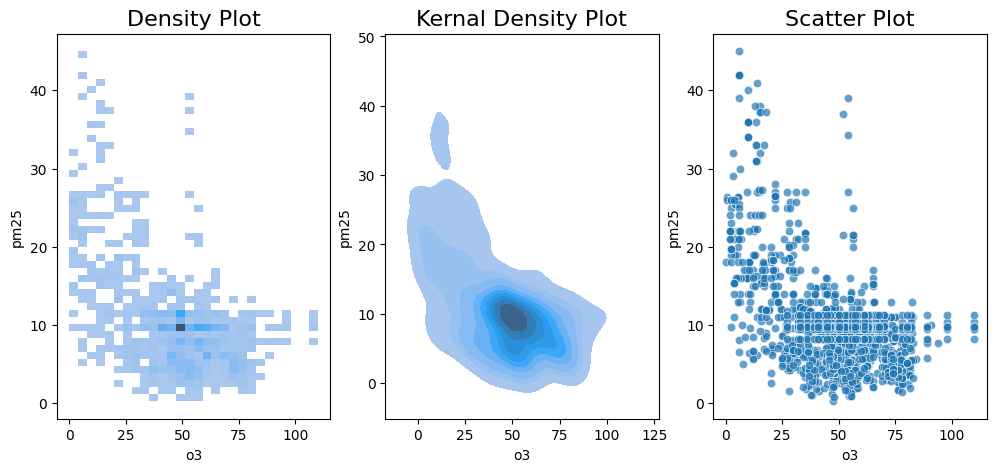

In [33]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5))

sns.histplot(data=df_filled, x='o3', y='pm25', ax=ax[0])
ax[0].set_title('Density Plot', fontsize=16)

sns.kdeplot(data=df_filled, x='o3', y='pm25', fill=True, ax=ax[1])
ax[1].set_title('Kernal Density Plot', fontsize=16)

sns.scatterplot(data=df_filled, x='o3', y='pm25',alpha=0.7, ax=ax[2])
ax[2].set_title('Scatter Plot', fontsize=16)

plt.show()

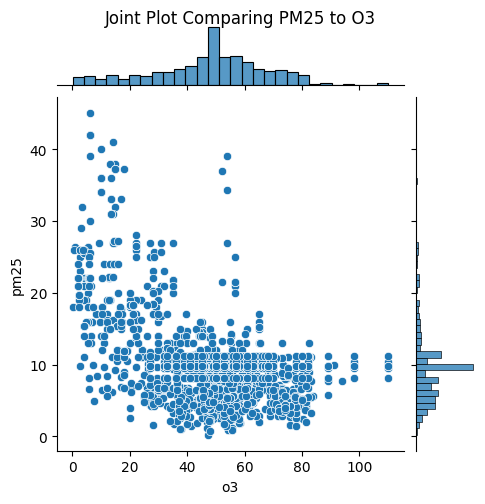

In [35]:
sns.jointplot(
    data=df_filled, 
    x='o3', 
    y='pm25',
    height=5
)
plt.suptitle('Joint Plot Comparing PM25 to O3', y=1)
plt.show()

**Key Points:**
- There seems to be no clear linear relationship between `PM2.5` and `O3`.
- The lack of a clear trend between `PM2.5` and `O3` could indicate that these two pollutants are not directly correlated in this dataset. External factors such as weather conditions, geographic location, and time of year could play a role in the observed concentrations.
- A cluster of points is visible at lower `PM2.5` values (less than 15), with `O3` levels varying widely from near 0 to over 80.
- The marginal histograms give insight into the overall distribution of both pollutants, showing that `PM2.5` levels tend to be lower overall, while `O3` levels are more widely distributed.

- Linear relationships between two variables can be identified by examining the **correlation** between the two variables. Pandas has a convenient `.corr()` method to view the correlations between all variables at once via its **correlation matrix**.

> Correlation is a number between -1 and 1. Correlation is positive when the variables increase together, and
Correlation is negative when one variable decreases as the other increases. A correlation near zero indicates the variables are not linearly related.

In [36]:
# pandas method
df_filled.corr()

parameter,tavg,co,no,no2,o3,pm10,pm25,so2,date,latitude,longitude
parameter,,,,,,,,,,,
tavg,1.000000,0.058953,-0.221376,-0.267582,0.300348,-0.324104,-0.236687,0.249517,0.343563,0.025871,0.001357
co,0.058953,1.000000,0.408081,0.606741,-0.399448,0.510728,0.527517,0.167175,0.152583,0.121998,0.086315
no,-0.221376,0.408081,1.000000,0.642967,-0.460738,0.430354,0.318059,0.146812,-0.224529,-0.020413,-0.140993
no2,-0.267582,0.606741,0.642967,1.000000,-0.571758,0.573999,0.464198,0.229643,-0.224146,0.029190,-0.031145
o3,0.300348,-0.399448,-0.460738,-0.571758,1.000000,-0.484241,-0.547283,-0.085718,0.371098,0.013634,0.003422
pm10,-0.324104,0.510728,0.430354,0.573999,-0.484241,1.000000,0.824989,0.282404,-0.175353,-0.011140,0.005043
pm25,-0.236687,0.527517,0.318059,0.464198,-0.547283,0.824989,1.000000,0.269116,-0.001839,-0.002965,0.047681
so2,0.249517,0.167175,0.146812,0.229643,-0.085718,0.282404,0.269116,1.000000,0.026164,0.001148,0.006324
date,0.343563,0.152583,-0.224529,-0.224146,0.371098,-0.175353,-0.001839,0.026164,1.000000,0.034172,0.036451


We can also view this correlation matrix in a visually pleasing way by using a seaborn heatmap

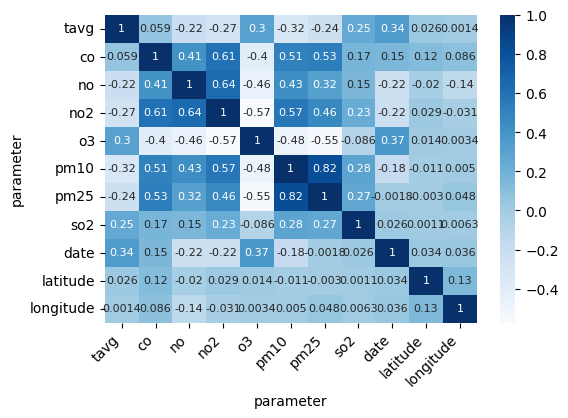

In [37]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_filled.corr(), cmap='Blues', annot=True, annot_kws={'fontsize': 8})
plt.xticks(rotation=45, ha='right')
plt.show()

**Example 6** in  [W4D5_Examples.ipynb](W4D5_Examples.ipynb) [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/sedv8808/LHL_Lectures/main?labpath=W4D5%2FW4D5_Examples.ipynb)

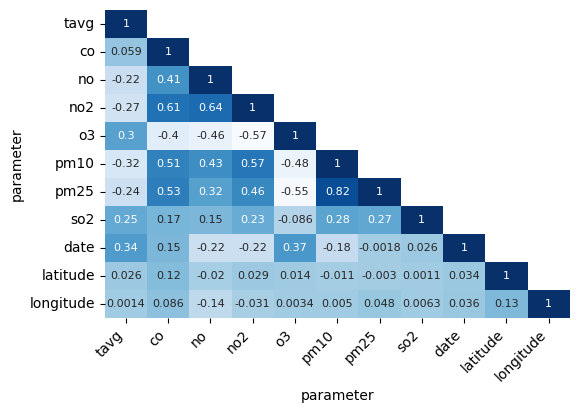

In [38]:
import numpy as np
mask = np.triu(np.ones_like(df_filled.corr(), dtype=bool), k=1)
plt.figure(figsize=(6, 4))
sns.heatmap(
    df_filled.corr(),
    mask=mask,
    cmap='Blues',
    annot=True,
    cbar=False,
    annot_kws={'fontsize': 8})
plt.xticks(rotation=45, ha='right')
plt.show()

Aisha can view different graphs that perform pairwise comparisons all at once beyond just looking at the correlation. 

To view and compare many distributions at the same time, use `pairplot()` or `pairgrid()` functions.

### Correlation Heatmap

- The heatmap shows the correlation between different features of the dataset. Correlation values range from -1 to 1:
  - A value close to 1 indicates a strong positive correlation, meaning as one feature increases, the other feature also increases.
  - A value close to -1 indicates a strong negative correlation, meaning as one feature increases, the other decreases.
  - Values close to 0 suggest weak or no linear relationship between features.

There seems to be a strong correlation between `PM2.5` and `PM10` and that could suggest they are related to similar sources of pollution.

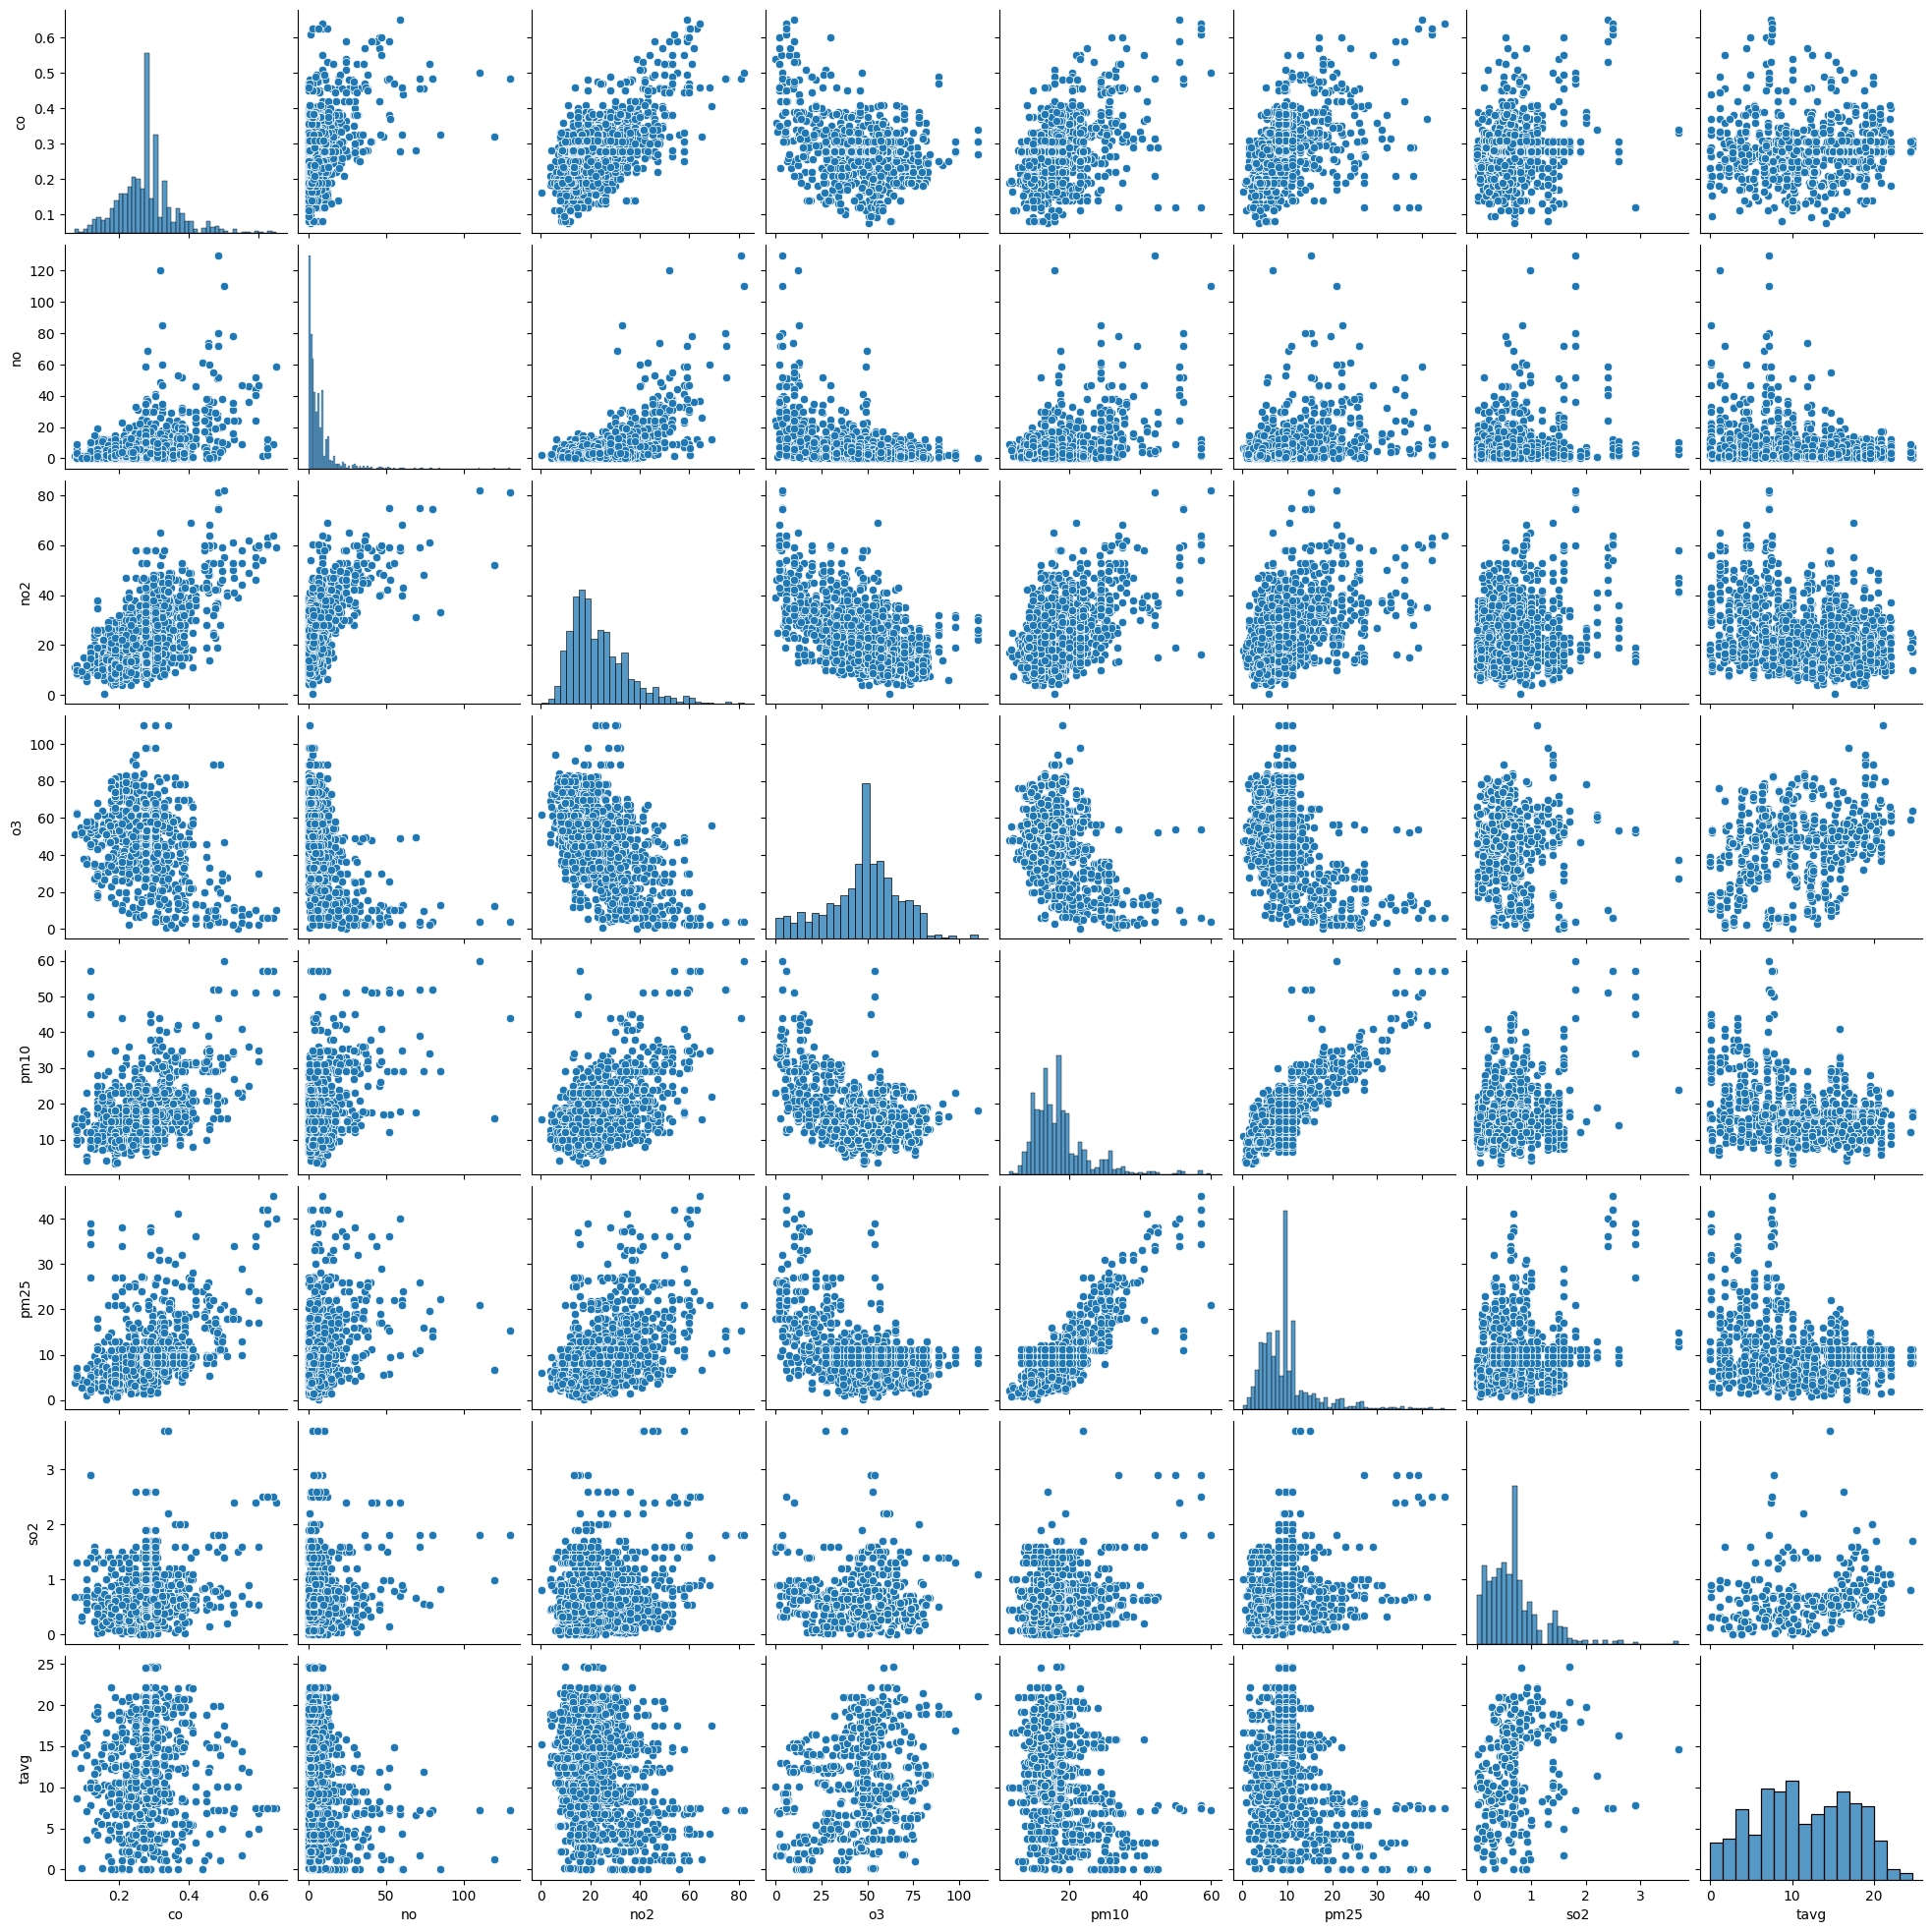

In [39]:
sns.pairplot(df_filled[['co', 'no', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'tavg']])
plt.show()

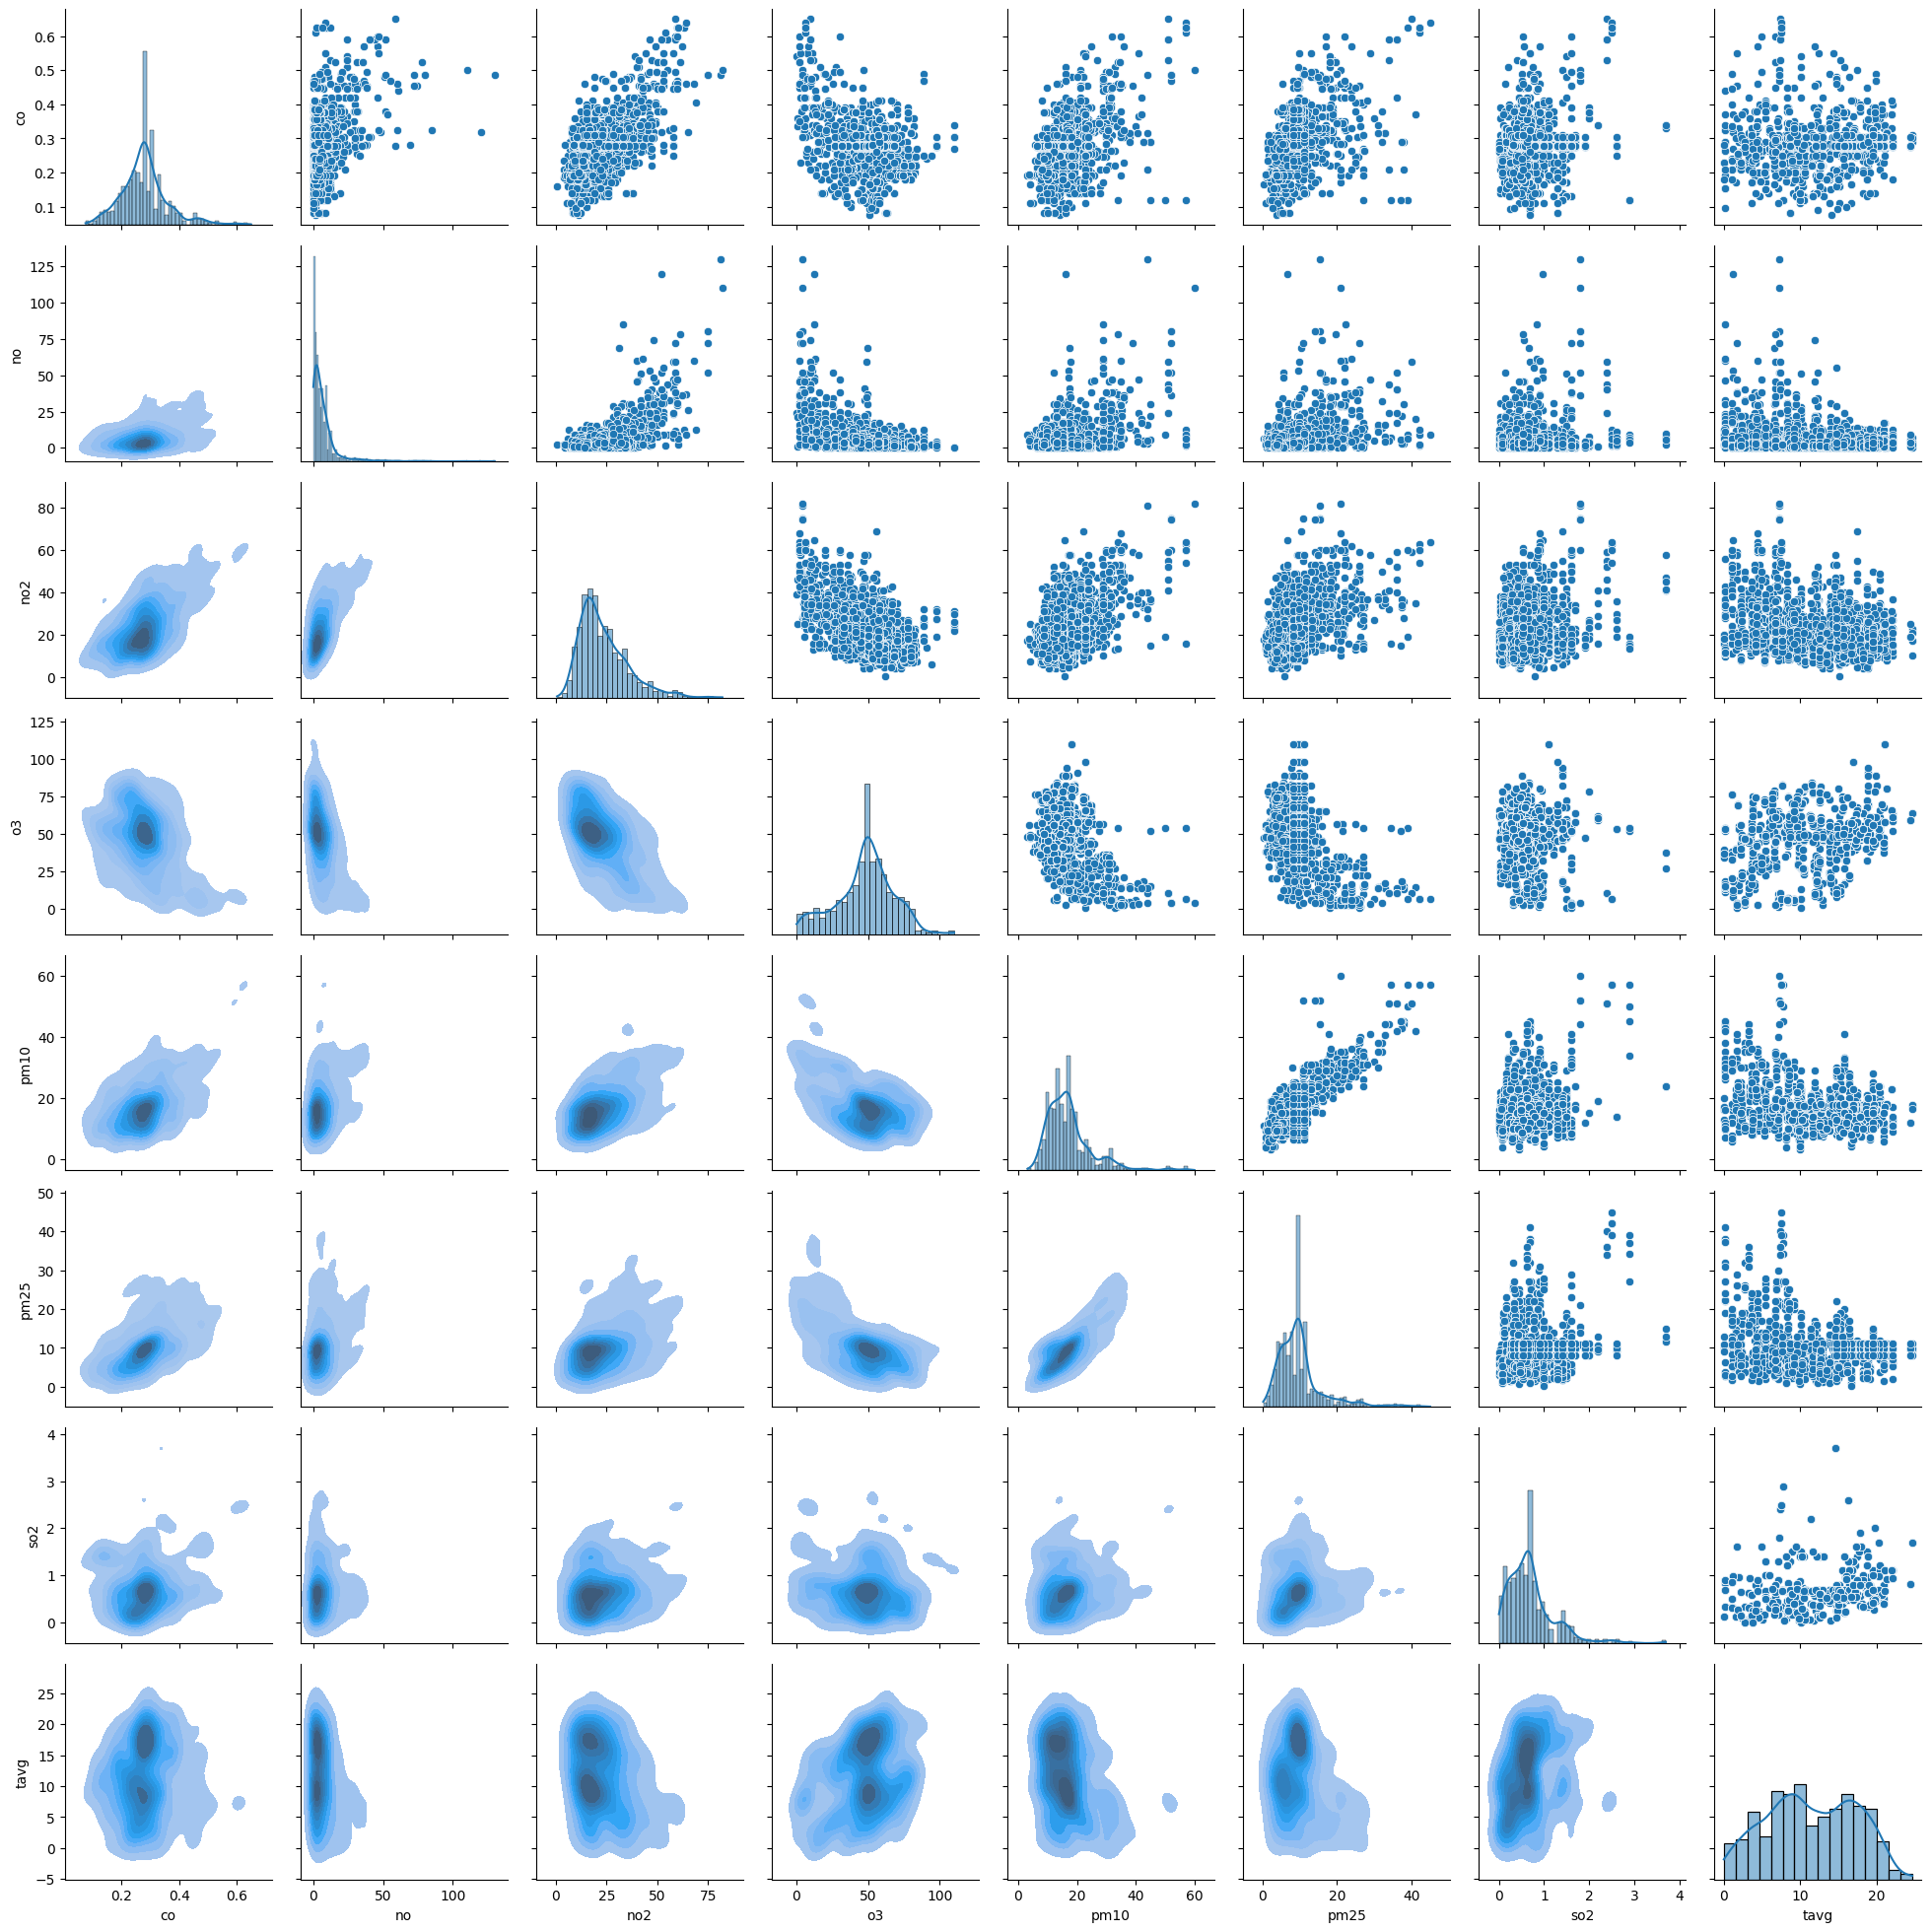

In [40]:
ax = sns.PairGrid(df_filled[['co', 'no', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'tavg']])

ax.map_upper(sns.scatterplot)
ax.map_lower(sns.kdeplot, fill=True)
ax.map_diag(sns.histplot, kde=True)
plt.show()

### Displaying info of more than two variables
Most of the time in seaborn, plotting functions take in an optional `hue` parameter which corresponds to a **categorical** variable that will be used to group the data using different colors. The colours and legend will be created automatically, but can be customized using parameters.

#### Adding a 3rd variable
```python
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_filled, x='pm25', y='o3', hue='pollution_level', s=75)
plt.legend(loc='upper left', fontsize='x-large')
plt.show()
```

#### Adding a 4th variable

```python
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_filled, x='pm25', y='o3', hue='pollution_level', size='month')
plt.show()
```
**Note:** More dimensions = more difficult to interpret

#### Analyzing Trends Over Time

Aisha would also like to see the trends in air quality over time to identify patterns, such as seasonal variations in pollution levels.

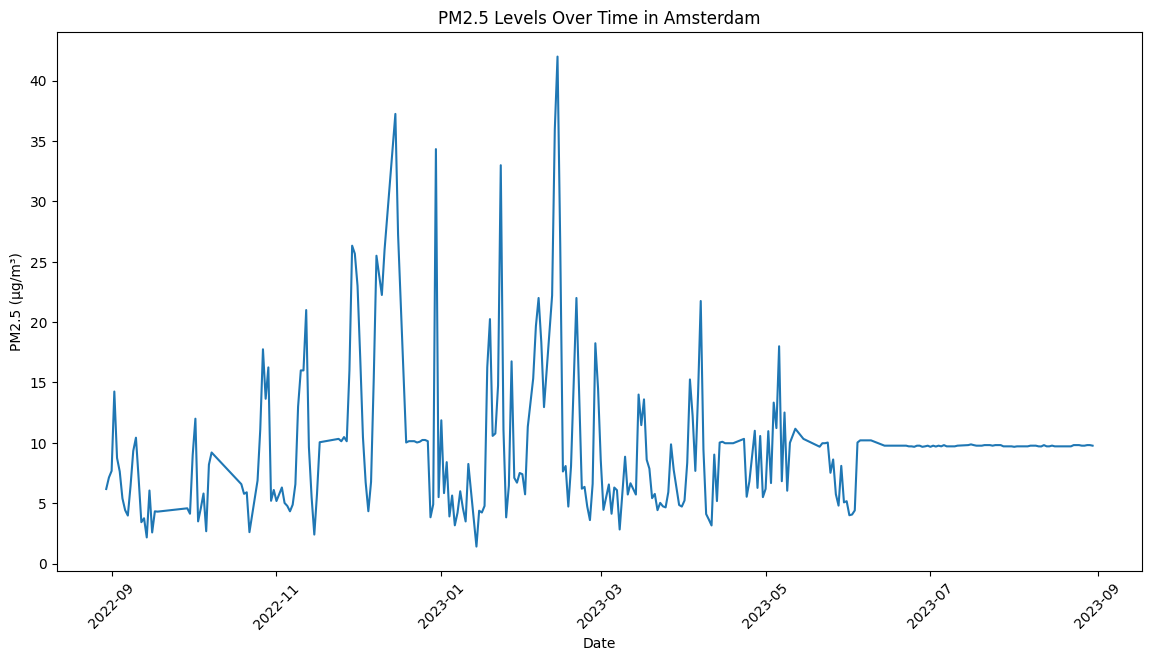

In [41]:
# Plotting trends for PM2.5
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_filled, x='date', y=df_filled['pm25'], errorbar=None)
plt.title('PM2.5 Levels Over Time in Amsterdam')
plt.xlabel('Date')
plt.ylabel('PM2.5 (µg/m³)')
plt.xticks(rotation=45)
plt.show()

### Why 3 different visualizing libraries?

#### Visualizing Pollution Distribution with a Heatmap

To gain deeper insights into air quality across different locations in Amsterdam, Aisha decides to create a heatmap on the city. This visualization will help her understand which areas are most affected by pollution, allowing her to focus her urban planning efforts effectively.

Using `latitude` and `longitude` lets create a heatmap of `PM2.5` concentrations.

In [42]:
import pandas as pd
import plotly.express as px

In [43]:
import plotly.io as pio

# Set the renderer to use in Jupyter Notebook
pio.renderers.default = 'iframe'  # or 'notebook_connected'

In [44]:
global_min = df_filled['pm25'].min()
global_max = df_filled['pm25'].max()

fig = px.density_mapbox(
    df_filled,
    lat='latitude',
    lon='longitude',
    z='pm25',
    radius=10,
    center=dict(lat=52.3676, lon=4.9041),
    mapbox_style="carto-positron",
    zoom=10,
    animation_frame='date',
    title='PM2.5 Concentrations in Amsterdam Over Time',
    range_color=[global_min, global_max],   # Set fixed maximum for color scale
)

fig.show()

## Data Visualization

- Visualizing data is a key part of the **EDA** process.
- Tools that we used:
    - **Matplotlib**: usually used when you want to quickly make a simple plot, or when you want very fine-grained control over every aspect of the plot.
    - **Seaborn**: usually used when presenting visualizations at a more professional level or when attempting to visualize more complex relationships easily. It is built on top of matplotlib, so you can use matplotlib to fine-tune your seaborn plots.
    - **Plotly**: usually used when you would like interactivity. Steeper learning curve and uses its own syntax.


- Visualization allows us to **interpret** and **summarize** large amounts of data in an efficient manner rather than just looking at the raw data or summary statistics.